In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('self-test-data.csv')

In [168]:
df.head()

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,HI,Hawaii,15.0,Region 9,50-64 Years,Missing,Non-Hispanic,Male,Negative,14
1,05/08/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,30-39 Years,Missing,Non-Hispanic,Female,Negative,36
2,05/08/2022 12:00:00 AM,CO,Colorado,8.0,Region 8,40-49 Years,Missing,Non-Hispanic,Female,Positive,31
3,05/08/2022 12:00:00 AM,OR,Oregon,41.0,Region 10,65-74 Years,Missing,Missing,Male,Negative,5
4,05/08/2022 12:00:00 AM,UT,Utah,49.0,Region 8,5-11 Years,Missing,Non-Hispanic,Female,Positive,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514469 entries, 0 to 514468
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         514469 non-null  object 
 1   state        514469 non-null  object 
 2   state_name   513539 non-null  object 
 3   state_fips   513539 non-null  float64
 4   fema_region  514469 non-null  object 
 5   age_group    514469 non-null  object 
 6   race         514469 non-null  object 
 7   ethnicity    514469 non-null  object 
 8   sex          514469 non-null  object 
 9   test_result  514469 non-null  object 
 10  total_tests  514469 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 43.2+ MB


In [12]:
df.isnull().sum()

date             0
state            0
state_name     930
state_fips     930
fema_region      0
age_group        0
race             0
ethnicity        0
sex              0
test_result      0
total_tests      0
dtype: int64

In [22]:
df['state_name'].value_counts()

California              31884
Texas                   22226
Florida                 21565
Illinois                20458
New York                18830
New Jersey              17276
Ohio                    16631
Minnesota               15982
Virginia                15972
Pennsylvania            15019
Georgia                 14176
Massachusetts           13761
Maryland                13730
Washington              13720
North Carolina          13436
Colorado                13259
Arizona                 12367
Michigan                11295
Wisconsin               11157
Connecticut              9982
Indiana                  9280
Tennessee                9260
Oregon                   9242
Missouri                 8866
South Carolina           8564
Nevada                   8387
Louisiana                8047
Utah                     7797
New Mexico               7730
Alabama                  7438
Oklahoma                 6990
Kansas                   6793
Hawaii                   6376
Kentucky  

In [23]:
df['state'].value_counts()

CA         31884
TX         22226
FL         21565
IL         20458
NY         18830
NJ         17276
OH         16631
MN         15982
VA         15972
PA         15019
GA         14176
MA         13761
MD         13730
WA         13720
NC         13436
CO         13259
AZ         12367
MI         11295
WI         11157
CT          9982
IN          9280
TN          9260
OR          9242
MO          8866
SC          8564
NV          8387
LA          8047
UT          7797
NM          7730
AL          7438
OK          6990
KS          6793
HI          6376
KY          6307
AR          6234
PR          5779
IA          5750
NE          5406
DC          5301
ME          5294
DE          5103
NH          5083
MS          4696
ID          4590
RI          4403
WV          3710
MT          3473
AK          3452
VT          3217
WY          2778
ND          2390
SD          2365
UNKNOWN      930
GU           357
VI           355
Name: state, dtype: int64

In [29]:
null_state_name = df[df['state_name'].isnull()]
null_state_name

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
810,07/24/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,42
1446,07/03/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,64
2130,01/30/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,311
2242,04/17/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,65-74 Years,Missing,Missing,Missing,Negative,18
2319,06/26/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,74
...,...,...,...,...,...,...,...,...,...,...,...
509596,01/30/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,75+ Years,Missing,Missing,Missing,Positive,1
510090,11/21/2021 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,65-74 Years,Missing,Missing,Missing,Positive,1
510258,05/29/2022 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,2-4 Years,Missing,Missing,Missing,Negative,1
511312,02/12/2023 12:00:00 AM,UNKNOWN,NaN,NaN,UNKNOWN,50-64 Years,Missing,Missing,Missing,Positive,1


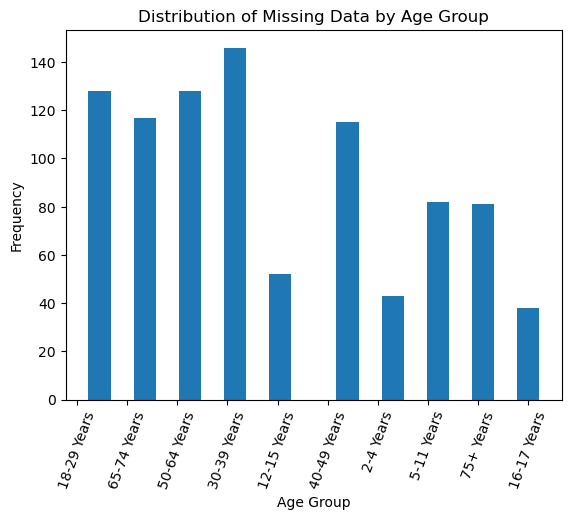

In [166]:
plt.hist(null_state_name['age_group'], bins = 20, align = 'right');

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Missing Data by Age Group')

plt.xticks(rotation= 70);

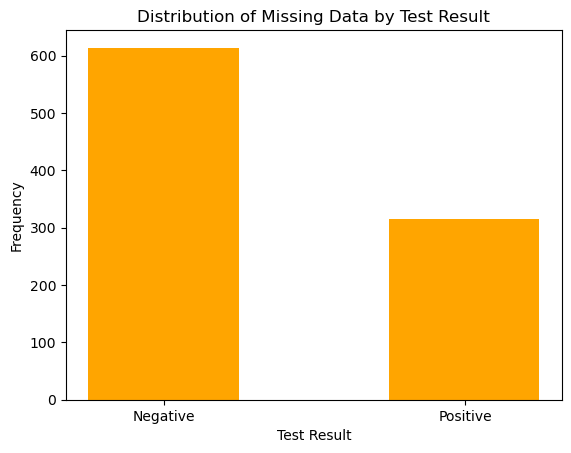

In [119]:
plt.hist(null_state_name['test_result'], bins = 3, color= 'orange')

plt.xlabel('Test Result')
plt.ylabel('Frequency')
plt.title('Distribution of Missing Data by Test Result')

plt.xticks((0.16667, 0.835));

In [120]:
null_state_name['date'] = pd.to_datetime(null_state_name['date'])

C:\Users\Jason Lu\AppData\Local\Temp\ipykernel_2776\4051554139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_state_name['date'] = pd.to_datetime(null_state_name['date'])


In [121]:
null_state_name

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
810,2022-07-24,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,42
1446,2022-07-03,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,64
2130,2022-01-30,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,311
2242,2022-04-17,UNKNOWN,NaN,NaN,UNKNOWN,65-74 Years,Missing,Missing,Missing,Negative,18
2319,2022-06-26,UNKNOWN,NaN,NaN,UNKNOWN,18-29 Years,Missing,Missing,Missing,Negative,74
...,...,...,...,...,...,...,...,...,...,...,...
509596,2022-01-30,UNKNOWN,NaN,NaN,UNKNOWN,75+ Years,Missing,Missing,Missing,Positive,1
510090,2021-11-21,UNKNOWN,NaN,NaN,UNKNOWN,65-74 Years,Missing,Missing,Missing,Positive,1
510258,2022-05-29,UNKNOWN,NaN,NaN,UNKNOWN,2-4 Years,Missing,Missing,Missing,Negative,1
511312,2023-02-12,UNKNOWN,NaN,NaN,UNKNOWN,50-64 Years,Missing,Missing,Missing,Positive,1


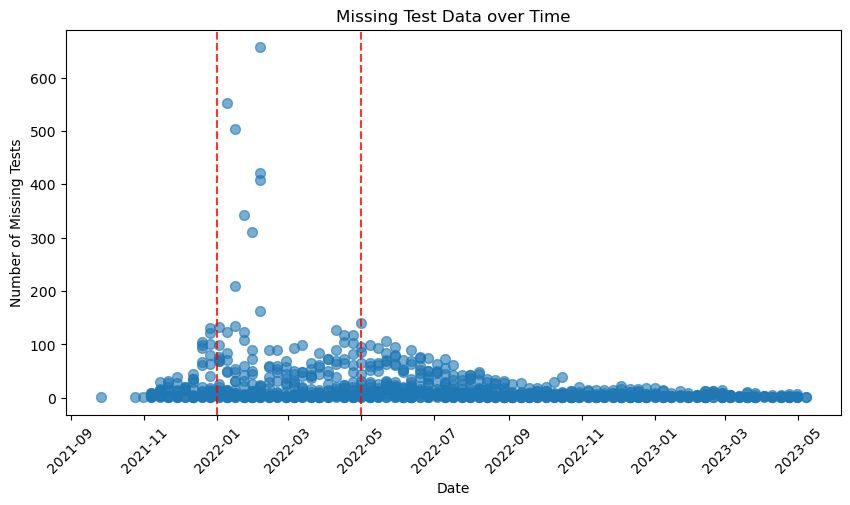

In [163]:
plt.figure(figsize=(10, 5))
plt.scatter(null_state_name['date'], null_state_name['total_tests'], alpha = 0.6, s = 50)

plt.axvline(pd.to_datetime('2022-01-01'), color='r', linestyle='--', alpha = 0.8) # draw vertical line at 2022-01-01
plt.axvline(pd.to_datetime('2022-05-01'), color='r', linestyle='--', alpha = 0.8) # draw vertical line at 2022-05-01

plt.xlabel('Date')
plt.ylabel('Number of Missing Tests')
plt.title('Missing Test Data over Time')
plt.xticks(rotation=45)
plt.show()